<a href="https://colab.research.google.com/github/kostyabuh/ml_system/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

In [16]:
pathToData=Path('/content/drive/MyDrive/Vehicles.v4i.coco/train')
annotationFile = Path('/content/drive/MyDrive/Vehicles.v4i.coco/train/_annotations.coco.json')
coco = COCO(annotationFile)
imgIds = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
tt = coco.loadAnns(coco.getAnnIds())
tt = [t['category_id'] for t in tt]
from collections import Counter
print(Counter(tt).values())
categories = [cat['name'] for cat in cats]
print(f"\nКоличество категорий: {len(categories)}\n")
print(f"Категории: {categories}")

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!
dict_values([10, 11, 10, 10, 10])

Количество категорий: 5

Категории: ['Bike', 'Car', 'Motorbike', 'Plane', 'Ship']


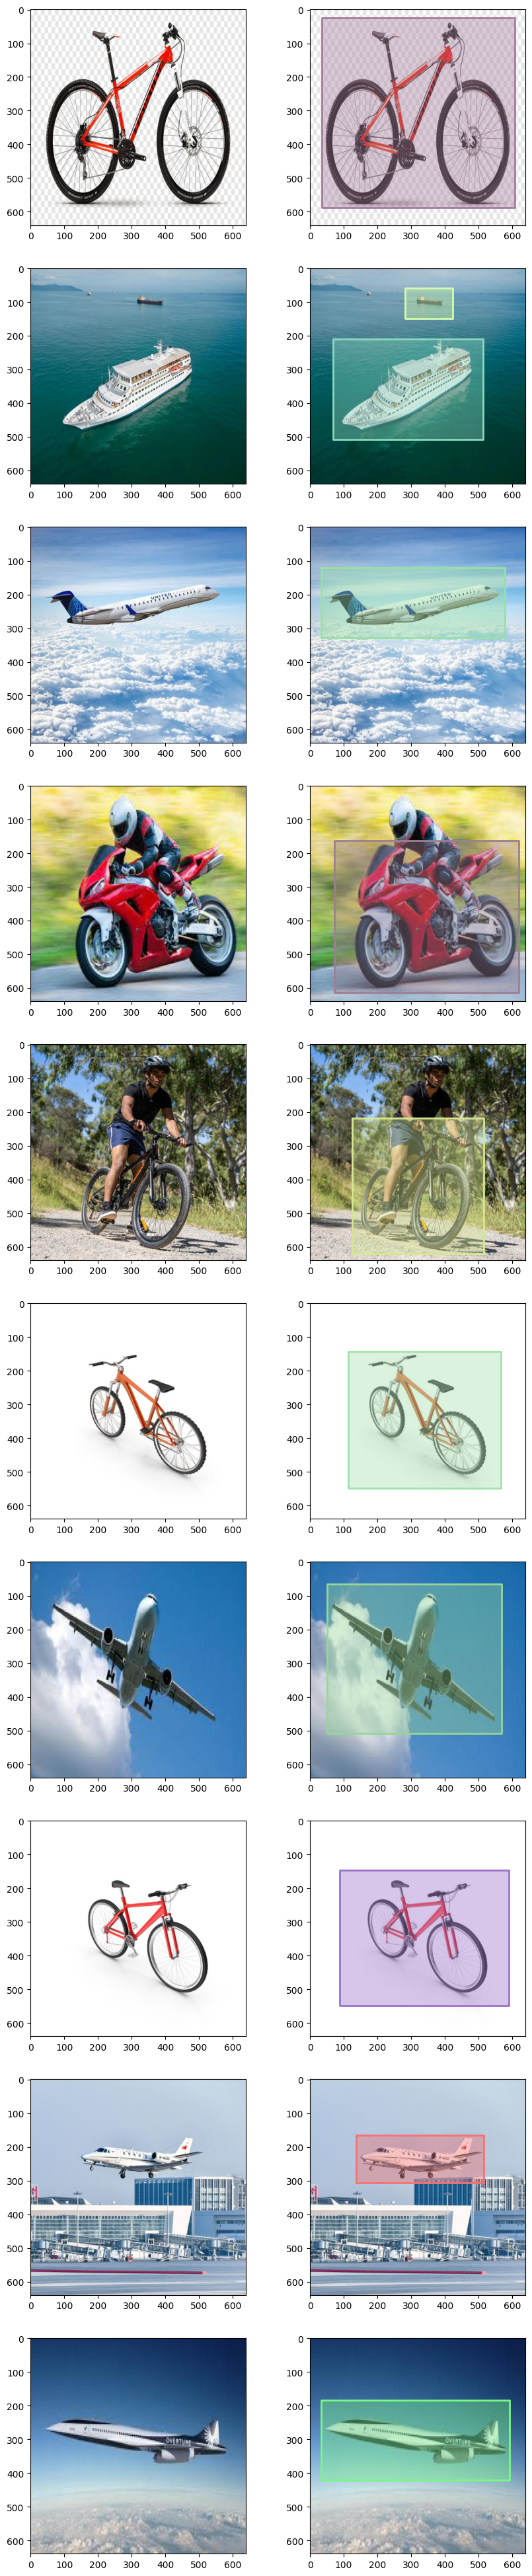

In [18]:
imgs = coco.loadImgs(imgIds[7:17])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(pathToData/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)